In [1]:
from google.colab import drive # type: ignore
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [2]:
%cd ..

/


In [3]:
!cp '/content/drive/MyDrive/Colab Notebooks/newdata.zip' content
!cp '/content/drive/MyDrive/Models.zip' content

In [4]:
%cd /content

/content


In [5]:
!unzip newdata.zip -d newdata
!unzip Models.zip -d Models

Archive:  newdata.zip
  inflating: newdata/Potato/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: newdata/Potato/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: newdata/Potato/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: newdata/Potato/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: newdata/Potato/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: newdata/Potato/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: newdata/Potato/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: newdata/Potato/Potato___Early_blight/028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG  
  inflating: newdata/Potato/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___R

In [7]:
%cd newdata

/content/newdata


In [8]:
ls # type: ignore

Potato/


In [9]:
import os
import numpy as np # type: ignore
from tensorflow.keras.preprocessing.image import load_img, img_to_array # type: ignore

def load_images_and_labels(directory, num_images_per_class=200):
    class_names = os.listdir(directory)
    images = []
    labels = []

    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        class_files = os.listdir(class_dir)
        class_labels = [class_name] * len(class_files)

        # Limit the number of images to load per class
        num_images = len(class_files)

        for i in range(num_images):
            file = class_files[i]
            file_path = os.path.join(class_dir, file)
            image = load_img(file_path, target_size=(256, 256))  # Adjust target size
            image_array = img_to_array(image)
            # image_array = tf.expand_dims(image_array, 0)
            images.append(image_array)
            labels.append(class_name)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Directory containing subdirectories of classes
main_directory = "Potato"

# Load images and labels
X_train, y_train = load_images_and_labels(main_directory)

# Print the shapes of the loaded data
print("Images Shape:", X_train.shape)
print("Labels Shape:", y_train.shape)



Images Shape: (2152, 256, 256, 3)
Labels Shape: (2152,)


In [10]:
x_len=len(X_train)

it=x_len%32
x_len=x_len-it
x_len

2144

In [11]:

X_train=X_train[:x_len,:,:,:]
y_train=y_train[:x_len]

In [12]:
X_train.shape

(2144, 256, 256, 3)

In [13]:
import numpy as np # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras.models import load_model # type: ignore

In [14]:
%cd ..

/content


In [15]:
densenet_model = load_model('/content/drive/MyDrive/Models/m_model_dense.hdf5')
squeeze_model = load_model('/content/drive/MyDrive/Models/m_model_squeeze.hdf5')
mobilenet_model = load_model('/content/drive/MyDrive/Models/mobilNetv2.hdf5')
xception_model = load_model('/content/drive/MyDrive/Models/xceptionet.hdf5')
vggmax_model = load_model('/content/drive/MyDrive/Models/vggmax.hdf5')

In [16]:
tf.keras.backend.clear_session()
import gc
gc.collect()

2428

In [17]:
model_list=[densenet_model, squeeze_model, mobilenet_model, xception_model,vggmax_model]

In [18]:
def get_stacked_predictions(model, X):
    batch_size = 32

    num_batches = len(X) // batch_size

    # Initialize lists to store predictions
    predictions_list = []

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size

        # Extract a batch of images and labels
        batch_images = X[start_idx:end_idx]


        batch_predictions = np.array([model.predict(batch_images)])

        # Append the batch predictions to the predictions list
        predictions_list.append(batch_predictions)

    # Combine the predictions from different batches horizontally
    stacked_prediction = np.vstack(predictions_list)
    # stacked_prediction = stacked_prediction.reshape(-1, 2)
    return stacked_prediction


In [19]:

tf.keras.backend.clear_session()

X_train_densenet_pred = get_stacked_predictions(densenet_model, X_train)
tf.keras.backend.clear_session()
import gc
gc.collect()

X_train_squeezenet_pred = get_stacked_predictions(squeeze_model, X_train)
tf.keras.backend.clear_session()
import gc
gc.collect()

X_train_mobilenetv2_pred = get_stacked_predictions(mobilenet_model, X_train)
tf.keras.backend.clear_session()
import gc
gc.collect()

X_train_xception_pred = get_stacked_predictions(xception_model, X_train)
tf.keras.backend.clear_session()
import gc
gc.collect()

X_train_vggmax_pred = get_stacked_predictions(vggmax_model, X_train)
tf.keras.backend.clear_session()
import gc
gc.collect()

tf.keras.backend.clear_session()

1/1 [==============================] - 0s 30ms/step


In [20]:
X_train_densenet_pred.shape

(67, 32, 3)

In [21]:

X_train_densenet_pred = X_train_densenet_pred.reshape(-1, 3)

# Flatten X_train_squeezenet_pred
X_train_squeezenet_pred = X_train_squeezenet_pred.reshape(-1, 3)

# Flatten X_train_mobilenetv2_pred
X_train_mobilenetv2_pred = X_train_mobilenetv2_pred.reshape(-1, 3)

# Flatten X_train_xception_pred
X_train_xception_pred = X_train_xception_pred.reshape(-1, 3)

X_train_vggmax_pred = X_train_vggmax_pred.reshape(-1, 3)


In [22]:
X_train_vggmax_pred.shape


(2144, 3)

In [23]:
y_train.shape

(2144,)

In [24]:
label_mapping = {
    'Potato___Early_blight': 0,
    'Potato___Late_blight': 1,
    'Potato___healthy': 2, # Add a new key for the value 2
}
y_train= np.array([label_mapping[label] for label in y_train])
y_train = y_train.astype(int)

In [25]:
import numpy as np # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.ensemble import StackingClassifier # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from tensorflow import keras # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from sklearn.metrics import accuracy_score # type: ignore

# Assuming you have the individual model predictions stored in variables like:
# X_train_cnn_pred, X_train_vgg19_pred, X_train_densenet_pred, X_train_resnet_pred, X_train_senet_pred

# Stacking the individual model predictions horizontally
stacked_predictions = np.hstack((X_train_densenet_pred, X_train_squeezenet_pred, X_train_mobilenetv2_pred,
                                  X_train_xception_pred,X_train_vggmax_pred))



In [26]:
stacked_predictions.shape

(2144, 15)

In [27]:
from tensorflow.keras.utils import to_categorical # type: ignore


# Split the data into train and test sets
X_train_stacked, X_test_stacked, y_train_stacked, y_test_stacked = train_test_split(
    stacked_predictions, y_train, test_size=0.3, random_state=42)

y_train_stacked_encoded = to_categorical(y_train_stacked, num_classes=3)
y_test_stacked_encoded = to_categorical(y_test_stacked, num_classes=3)


In [28]:
# Define the architecture of the final neural network
final_estimator = Sequential([
    Dense(512, activation='relu', input_shape=(stacked_predictions.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='sigmoid')  # Binary classification, so using sigmoid activation
])


In [29]:

# Compile the final model
final_estimator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [30]:
# Assuming 'encoded_labels' is a NumPy array containing one-hot encoded labels
i=10
for label in y_train_stacked_encoded:
    if(i==0):
      break
    i=i-1
    print(label)


[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 1. 0.]
[1. 0. 0.]


In [31]:
# Assuming 'encoded_labels' is a NumPy array containing one-hot encoded labels
i=10
for label in y_train_stacked:
    if(i==0):
      break
    i=i-1
    print(label)


0
0
0
0
1
1
0
0
1
0


In [32]:
history = final_estimator.fit(X_train_stacked, y_train_stacked_encoded, epochs=251, batch_size=32, validation_split=0.3)

Epoch 1/251
33/33 [==============================] - 2s 10ms/step - loss: 0.1953 - accuracy: 0.9629 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 2/251
33/33 [==============================] - 0s 4ms/step - loss: 7.4055e-04 - accuracy: 1.0000 - val_loss: 7.2495e-04 - val_accuracy: 1.0000
Epoch 3/251
33/33 [==============================] - 0s 4ms/step - loss: 1.6974e-04 - accuracy: 1.0000 - val_loss: 7.3078e-04 - val_accuracy: 1.0000
Epoch 4/251
33/33 [==============================] - 0s 5ms/step - loss: 1.0622e-04 - accuracy: 1.0000 - val_loss: 7.0043e-04 - val_accuracy: 1.0000
Epoch 5/251
33/33 [==============================] - 0s 4ms/step - loss: 8.2122e-05 - accuracy: 1.0000 - val_loss: 6.5065e-04 - val_accuracy: 1.0000
Epoch 6/251
33/33 [==============================] - 0s 5ms/step - loss: 6.6249e-05 - accuracy: 1.0000 - val_loss: 7.8516e-04 - val_accuracy: 1.0000
Epoch 7/251
33/33 [==============================] - 0s 4ms/step - loss: 5.1250e-05 - accuracy: 1.0000 - val_loss

In [33]:
# Save the final estimator model
from tensorflow.keras.models import load_model # type: ignore
final_estimator.save('/content/drive/MyDrive/Models/final_estimator_model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
import pwd

In [35]:
tf.keras.backend.clear_session()
import gc
gc.collect()

1533

In [37]:
%cd  newdata

/content/newdata


In [38]:
import tensorflow as tf # type: ignore

directory="Potato"
dataset=tf.keras.utils.image_dataset_from_directory(
    directory,
    shuffle= True,
    batch_size=32,
    image_size=(256, 256),

)

Found 2152 files belonging to 3 classes.


In [39]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [40]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score   # type: ignore

# Evaluate the model on the test data
y_pred = final_estimator.predict(X_test_stacked)

# Convert predicted probabilities to class labels (choose the class with the highest probability)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_stacked, y_pred_labels)
print(f'Accuracy: {accuracy:.4f}')


21/21 [==============================] - 0s 1ms/step
Accuracy: 0.9984


In [41]:
y_pred_labels

array([1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0,

In [42]:
y_test_stacked

array([1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0,
       1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0,

In [43]:

# Generate a classification report with precision, recall, F1-score for each class
report = classification_report(y_test_stacked, y_pred_labels, target_names=class_names)
print('Classification Report:')
print(report)


Classification Report:
                       precision    recall  f1-score   support

Potato___Early_blight       1.00      1.00      1.00       307
 Potato___Late_blight       1.00      1.00      1.00       297
     Potato___healthy       1.00      1.00      1.00        40

             accuracy                           1.00       644
            macro avg       1.00      1.00      1.00       644
         weighted avg       1.00      1.00      1.00       644



In [44]:

# Calculate and display the confusion matrix
confusion = confusion_matrix(y_test_stacked, y_pred_labels)
print('Confusion Matrix:')
print(confusion)




Confusion Matrix:
[[307   0   0]
 [  1 296   0]
 [  0   0  40]]


In [45]:
# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test_stacked, y_pred_labels, average=None)
recall = recall_score(y_test_stacked, y_pred_labels, average=None)
f1 = f1_score(y_test_stacked, y_pred_labels, average=None)


In [46]:

# Print precision, recall, and F1-score for each class
for i, class_name in enumerate(class_names):
    print(f'Class: {class_name}')
    print(f'Precision: {precision[i]:.4f}')
    print(f'Recall: {recall[i]:.4f}')
    print(f'F1-Score: {f1[i]:.4f}')
    print('')

Class: Potato___Early_blight
Precision: 0.9968
Recall: 1.0000
F1-Score: 0.9984

Class: Potato___Late_blight
Precision: 1.0000
Recall: 0.9966
F1-Score: 0.9983

Class: Potato___healthy
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000



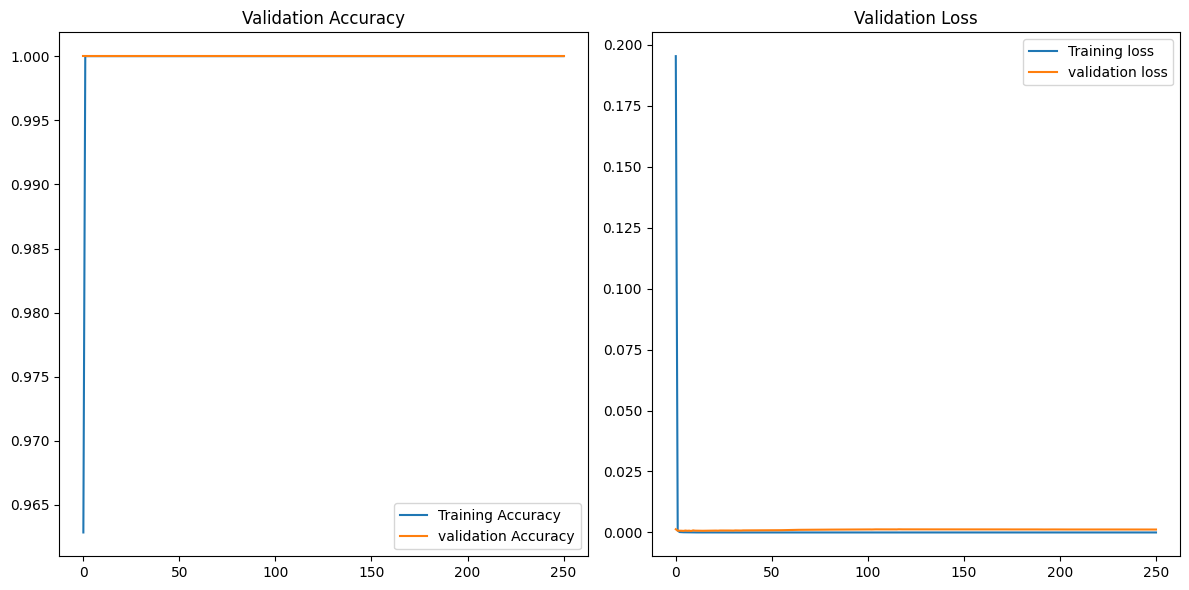

In [47]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
import matplotlib.pyplot as plt  # type: ignore
import math


EPOCHS=251
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training')

plt.subplot(1,2,1)
plt.plot(range(EPOCHS),val_acc,label='validation Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.legend(loc='upper right')
plt.title('Training Loss')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('Validation Loss')



plt.tight_layout()
plt.show()




In [48]:
from sklearn.metrics import precision_score, f1_score, confusion_matrix  # type: ignore


# Calculate precision and F1-score
precision = precision_score(y_test_stacked, y_pred_labels, average='weighted')
f1 = f1_score(y_test_stacked, y_pred_labels, average='weighted')

print("Precision:", precision)
print("F1-Score:", f1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_stacked, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)


Precision: 0.9984522465112526
F1-Score: 0.9984471581332448
Confusion Matrix:
[[307   0   0]
 [  1 296   0]
 [  0   0  40]]


21/21 [==============================] - 0s 1ms/step


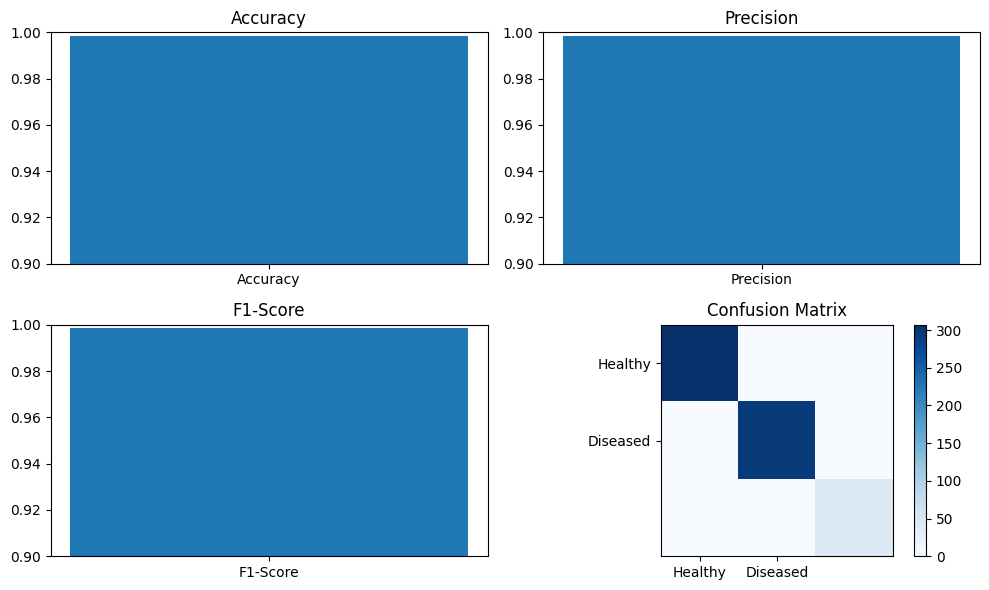

In [49]:
import numpy as np  # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix # type: ignore

# Predictions using the meta-model
y_pred_prob = final_estimator.predict(X_test_stacked)
y_pred_binary = (y_pred_prob >= 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_stacked, y_pred_labels)
precision = precision_score(y_test_stacked, y_pred_labels, average='weighted')
f1 = f1_score(y_test_stacked, y_pred_labels, average='weighted')
conf_matrix = confusion_matrix(y_test_stacked, y_pred_labels)

# Plot the metrics
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(['Accuracy'], [accuracy])
plt.ylim(0.9, 1.0)
plt.title('Accuracy')

plt.subplot(2, 2, 2)
plt.bar(['Precision'], [precision])
plt.ylim(0.9, 1.0)
plt.title('Precision')

plt.subplot(2, 2, 3)
plt.bar(['F1-Score'], [f1])
plt.ylim(0.9, 1.0)
plt.title('F1-Score')

plt.subplot(2, 2, 4)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Healthy', 'Diseased'])
plt.yticks([0, 1], ['Healthy', 'Diseased'])

plt.tight_layout()
plt.show()
